## Observations and Insights

1. Capomulin drug regimen seemed to make the tumor shrink for Mouse ID s185, except for a 0.5623 increase at timepoint 15
2. Greater the weight of the mouse the larger the vaerage tumor volume.
3. 

## Dependencies and starter code

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pandas import DataFrame

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results,on = "Mouse ID", how = "outer")
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
regimen_grp = merge_table.groupby(['Drug Regimen'])
regimen_grp

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grp = merge_table.groupby("Drug Regimen")
count_stat = regimen_grp['Tumor Volume (mm3)'].describe()["count"]
mean_stat = regimen_grp['Tumor Volume (mm3)'].describe()['mean']
median_stat = regimen_grp['Tumor Volume (mm3)'].describe()['50%']
var_stat = regimen_grp['Tumor Volume (mm3)'].var()
std_stat = regimen_grp['Tumor Volume (mm3)'].describe()['std']
sem_stat = regimen_grp['Tumor Volume (mm3)'].sem()
summary_stat = pd.DataFrame({"Count": count_stat ,"Mean": mean_stat, "Median": median_stat, "Variance": var_stat,"Std": std_stat, "SEM": sem_stat})
summary_stat

,Count,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,,
Capomulin,230.0,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178.0,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178.0,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188.0,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186.0,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181.0,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161.0,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228.0,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181.0,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

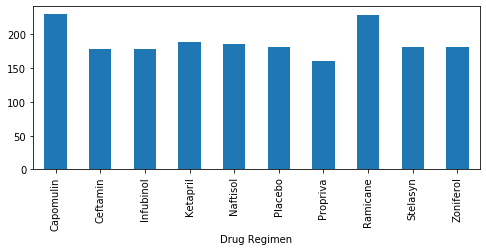

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
multi_plot = count_stat.plot(kind="bar", figsize=(8,3))

In [6]:
count_stat

Drug Regimen
Capomulin    230.0
Ceftamin     178.0
Infubinol    178.0
Ketapril     188.0
Naftisol     186.0
Placebo      181.0
Propriva     161.0
Ramicane     228.0
Stelasyn     181.0
Zoniferol    182.0
Name: count, dtype: float64

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

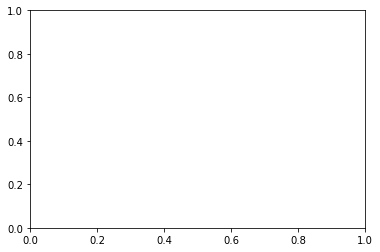

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(summary_stat))
tick_loc = [value for value in x_axis]
plt.bar(x_axis, summary_stat['Count'], color='r', alpha=0.5, align="center", width=0.4)
plt.xticks(tick_loc, summary_stat("Drug Regimen"), rotation="vertical")

## Pie plots

In [ ]:
ramicane_df=merge_table.loc[merge_table['Drug Regimen']=="Ramicane"]
timecount_ram = ramicane_df.sort_values(by=['Timepoint'])
lastval_ram = timecount_ram.groupby(['Mouse ID']).last()
lastval_ram = lastval_ram.sort_values(by=['Tumor Volume (mm3)'])
#lastval_ram
tumvol_ram = lastval_ram['Tumor Volume (mm3)']
quartiles_ram = tumvol_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

In [ ]:
ram_tumVol_List = []
for row in tumvol_ram:
    ram_tumVol_List.append(row)

In [ ]:
infubinol_df=merge_table.loc[merge_table['Drug Regimen']=="Infubinol"]
timecount_inf = infubinol_df.sort_values(by=['Timepoint'])
lastval_inf = timecount_inf.groupby(['Mouse ID']).last()
lastval_inf = lastval_inf.sort_values(by=['Tumor Volume (mm3)'])
#lastval_inf
tumvol_inf = lastval_inf['Tumor Volume (mm3)']
quartiles_inf = tumvol_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

In [ ]:
inf_tumVol_List = []
for row in tumvol_inf:
    inf_tumVol_List.append(row)

In [ ]:
ceftamin_df=merge_table.loc[merge_table['Drug Regimen']=="Ceftamin"]
timecount_cef = ceftamin_df.sort_values(by=['Timepoint'])
lastval_cef = timecount_cef.groupby(['Mouse ID']).last()
lastval_cef = lastval_cef.sort_values(by=['Tumor Volume (mm3)'])
#lastval_cef
tumvol_cef = lastval_cef['Tumor Volume (mm3)']
quartiles_cef = tumvol_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

In [ ]:
cef_tumVol_List = []
for row in tumvol_cef:
    cef_tumVol_List.append(row)

In [ ]:
promising_reg = [capo_tumVol_List,ram_tumVol_List,inf_tumVol_List,cef_tumVol_List]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Final tumor volume of each mouse across four most promising regimens')
ax1.boxplot(promising_reg)
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel("Treatment Regimens")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.set_axisbelow(True)

bp = plt.boxplot(promising_reg, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color="green")
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='blue', marker= 'o')

plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
capomulin_df_s185=capomulin_df.loc[capomulin_df['Mouse ID']=="s185"]
capomulin_df_s185 = DataFrame(capomulin_df_s185, columns=['Timepoint','Tumor Volume (mm3)'])
capomulin_df_s185.plot(x='Timepoint',y='Tumor Volume (mm3)',marker = 'o')
plt.legend(loc="upper right")
plt.title("Time point versus tumor volume for Mouse ID s185 treated with Capomulin")
plt.ylabel("Tumor Volume of Mouse s185")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
weight_grp=capomulin_df.groupby("Weight (g)")
tumor_avg = weight_grp['Tumor Volume (mm3)'].describe()['mean']
tumor_avg

In [ ]:
w_df=pd.DataFrame({"Average Tumor Volume": tumor_avg })
w_df

In [ ]:
mouse_weight=DataFrame(capomulin_df,columns=['Weight (g)','Tumor Volume (mm3)'])  
mouse_weight

In [ ]:
mouse_grp = mouse_weight.groupby(['Weight (g)']).mean()
mouse_grp.reset_index()

In [ ]:
mouse_weight=DataFrame(capomulin_df,columns=['Weight (g)','Tumor Volume (mm3)'])     
x=mouse_weight['Weight (g)']
y=mouse_weight['Tumor Volume (mm3)']
plt.scatter(x=x,y=y,facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs average tumor volume for the Capomulin regimen")
plt.xlim=(0,50)
plt.ylim(0,50)

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [ ]:
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin rerimen is {round(correlation[0],2)}")

In [ ]:
#x_values=capo_scatplt['Weight (g)']
#y_values=capo_scatplt['Tumor Volume (mm3)']
x_values=mouse_weight['Weight (g)']
y_values=mouse_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.show()